# Figure 2d

## Plot the TERT promoter and the positive selection there

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42

In [6]:
sys.path.append('../../')
from consensus_variables import *

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
plots_dir = "plot/fig2d_TERT"

In [9]:
somatic_maf_df = pd.read_table(somatic_maf_file)

/tmp/ipykernel_4080510/2010110460.py:1: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  somatic_maf_df = pd.read_table(somatic_maf_file)


#### Define TERT promoter regions: chr5:1294942-1295289

In [10]:
mutations_in_tert_promoter = somatic_maf_df[(somatic_maf_df['CHROM'] == 'chr5') &
                                                (somatic_maf_df['POS'] >= 1294942) &
                                                (somatic_maf_df['POS'] <= 1295289)
                                        ].copy()

mutations_in_tert_promoter.head()

,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,REF_DEPTH,VAF,vd_DEPTH,vd_ALT_DEPTH,vd_REF_DEPTH,vd_VAF,numNs,VAF_Ns,DEPTH_AM,ALT_DEPTH_AM,REF_DEPTH_AM,VAF_AM,numNs_AM,VAF_Ns_AM,DEPTH_ND,ALT_DEPTH_ND,VAF_ND,VAF_distorted_expanded,VAF_distorted_expanded_sq,VAF_distortion,VAF_distortion_sq,MUT_ID,SAMPLE_ID,METHOD,PROJECT_NAME,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,ENSP,gnomADe_AF,gnomADe_AFR_AF,gnomADe_AMR_AF,gnomADe_ASJ_AF,gnomADe_EAS_AF,gnomADe_FIN_AF,gnomADe_NFE_AF,gnomADe_OTH_AF,gnomADe_SAS_AF,gnomADg_AF,gnomADg_AFR_AF,gnomADg_AMI_AF,gnomADg_AMR_AF,gnomADg_ASJ_AF,gnomADg_EAS_AF,gnomADg_FIN_AF,gnomADg_MID_AF,gnomADg_NFE_AF,gnomADg_OTH_AF,gnomADg_SAS_AF,CLIN_SIG,SOMATIC,PHENO,canonical_Location,canonical_Allele,canonical_Gene,canonical_Feature,canonical_Feature_type,canonical_Consequence,canonical_cDNA_position,canonical_CDS_position,canonical_Protein_position,canonical_Amino_acids,canonical_Codons,canonical_IMPACT,canonical_DISTANCE,canonical_STRAND,canonical_FLAGS,canonical_SYMBOL,canonical_SYMBOL_SOURCE,canonical_HGNC_ID,canonical_CANONICAL,canonical_ENSP,canonical_CLIN_SIG,canonical_Consequence_single,canonical_Consequence_broader,canonical_Protein_affecting,Consequence_single,Consequence_broader,Protein_affecting,CONTEXT_MUT,MUTTYPE,CONTEXT_MUT_SIGPRO,gnomAD_SNP,HOTSPOT_NAME,MUT_ID_pyr,CHROM_ensembl,POS_ensembl,REF_ensembl,ALT_ensembl,TYPE,INDEL_LENGTH,INDEL_INFRAME,INDEL_MULTIPLE3,N_rich_frequency,VAF_Ns_threshold,FILTER.cohort_n_rich_uni,FILTER.gnomAD_SNP,FILTER.not_covered,FILTER.not_in_exons,FILTER.p10,FILTER.pSTD,FILTER.repetitive_variant,FILTER.cohort_n_rich,FILTER.low_complex_repetitive,FILTER.LongMSI,FILTER.cohort_n_rich_threshold,FILTER.AM_no_pileup_support,FILTER.no_pileup_support,FILTER.n_rich,FILTER.other_sample_SNP,FILTER.PASS,FILTER.AM_not_searched_COMPLEX,FILTER.not_searched_COMPLEX,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3
42651,chr5,1294948,CAG,C,pSTD,SAMPLE=P19_0011_BDO_01;TYPE=Deletion;DP=1255;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1255:1:1254,1:0.0008:649,605:1,0:1253:1252...",1253,1,1252,0.000798,1255,1,1254,0.000797,0,0.000000,2757,1,2756,0.000363,3,0.001087,1504,0,0.000000,False,False,0.454480,0.900453,chr5:1294948_CAG>C,P19_0011_BDO_01,med,NaN,chr5:1294949-1294950,-,ENSG00000164362,ENST00000310581,Transcript,frameshift_variant,119-120,40-41,14,L/X,CTg/g,-,HIGH,-,-1,-,TERT,HGNC,HGNC:11730,YES,ENSP00000309572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-,chr5:1294949-1294950,-,ENSG00000164362,ENST00000310581,Transcript,frameshift_variant,119-120,40-41,14,L/X,CTg/g,HIGH,-,-1.0,-,TERT,HGNC,HGNC:11730,YES,ENSP00000309572,-,frameshift_variant,nonsense,protein_affecting,frameshift_variant,nonsense,protein_affecting,-,-,-,False,-,chr5:1294948_CAG>C,5,1294949,AG,-,DELETION,2,False,False,0.0,1.1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
42652,chr5,1294964,G,T,pSTD,SAMPLE=P19_0034_BDO_01;TYPE=SNV;DP=4769;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:4769:1:4768,1:0.0002:1690,3078:0,1:4769:47...",4769,1,4768,0.000210,4769,1,4768,0.000210,37,0.007699,7813,1,7812,0.000128,47,0.005980,3044,0,0.000000,False,False,0.610393,0.944927,chr5:1294964_G>T,P19_0034_BDO_01,med,NaN,chr5:1294964,T,-,-,-,synonymous,-,-,-,-,-,-,MODERATE,-,-,-,TERTpromoter,-,-,-,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-,-,chr5:1294964,T,-,-,-,synonymous,-,-,-,-,-,MODERATE,-,-,-,TERTpromoter,-,-,-,-,-,synonymous,synonymous,non_protein_affecting,synonymous,synonymous,non_protein_affecting,GCC>A,C>A,G[C>A]C,False,-,chr5:1294964_C>A,5,12

In [11]:
print( mutations_in_tert_promoter[mutations_in_tert_promoter["TYPE"] == "SNV"].shape[0], "mutations")

85 mutations


In [12]:
print(len(mutations_in_tert_promoter[mutations_in_tert_promoter["TYPE"] == "SNV"]["SAMPLE_ID"].unique()), "samples")

42 samples


In [13]:
# mutations_in_tert_promoter[mutations_in_tert_promoter["TYPE"] == "SNV"].shape
# len(mutations_in_tert_promoter["SAMPLE_ID"].unique())
# mutations_in_tert_promoter.groupby(by = 'MUT_ID').size().sort_values(ascending = False).head(6)
# mutations_in_tert_promoter[mutations_in_tert_promoter["MUT_ID"] == "chr5:1295113_G>A"].iloc[0,4]

In [14]:
def plot_count_track_tert(count_df,
                            axes, 
                            colors_dict,
                            ax=0, 
                            negative=False, 
                            label_pos_track=None,
                            label_neg_track=None,
                            ymargin=None,
                            alpha=1,
                            indel=False):


    for cnsq in ['missense', 'synonymous']:

        count_cnsq_df = count_df[count_df["Consequence"] == cnsq].reset_index(drop=True)
        # count_cnsq_df = pos_df.merge(count_cnsq_df, on="Pos", how="left")

        axes[ax].vlines(count_cnsq_df["Pos"], ymin=0, ymax=count_cnsq_df["Count"], lw=1, zorder=1, alpha=0.5, color=colors_dict["hv_lines_needle"])
        axes[ax].scatter(count_cnsq_df["Pos"], count_cnsq_df["Count"], color='white', zorder=3, lw=1, ec="white") # To cover the overlapping needle top part
        axes[ax].scatter(count_cnsq_df["Pos"].values, count_cnsq_df["Count"].values, zorder=4, 
                            alpha=alpha, lw=0.1, ec="black", s=60, label='Mutation observed in tumors\n(activating)' if cnsq == 'missense' else 'Mutation not observed in tumors', color=colors_dict["omega_synon_tert" if cnsq == 'synonymous' else "omega_miss_tert"]) 



In [15]:
counts_per_position = mutations_in_tert_promoter.groupby(by = ['MUT_ID', 'Consequence', 'POS'])['ALT_DEPTH'].size().to_frame('Count').reset_index()
counts_per_position.columns = ['Mutation', 'Consequence', 'Pos', 'Count']
counts_per_position.head()

,Mutation,Consequence,Pos,Count
0,chr5:1294948_CAG>C,frameshift_variant,1294948,1
1,chr5:1294964_G>T,synonymous,1294964,1
2,chr5:1294973_C>T,synonymous,1294973,1
3,chr5:1294976_G>A,synonymous,1294976,1
4,chr5:1294990_C>T,synonymous,1294990,2


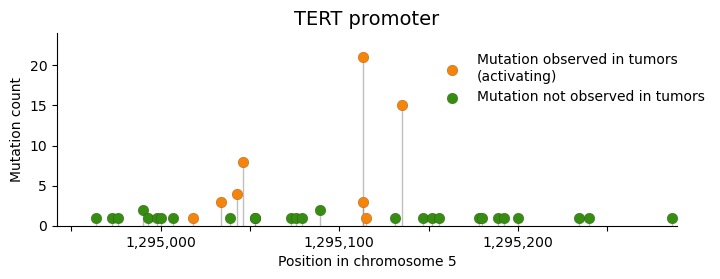

In [16]:
fig, ax = plt.subplots(1,1, figsize = (8, 2.5))
plot_count_track_tert(counts_per_position, axes=[ax], ax=0,
                      colors_dict=metrics_colors_dictionary, indel=False,
                      alpha = 1
                     )
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0,24)
ax.set_xlabel("Position in chromosome 5")
ax.set_ylabel("Mutation count")
ax.set_title("TERT promoter", fontsize = 14)
ytickss = [x for x in ax.get_yticks()[0:-1:1] if not (x % 1) ] 
ax.set_yticks(ytickss)
ax.set_yticklabels([f"{int(x):,}" for x in ytickss])

xtickss = ax.get_xticks()[1:-1:1]
ax.set_xticks(xtickss)
ax.set_xticklabels([f"{int(x):,}" if not x%100 else "" for x in xtickss])
ax.set_xlim(1294942, 1295289)
fig.legend(frameon = False, bbox_to_anchor = (0.95, 0.85), fontsize = 10)
fig.savefig(f"{plots_dir}/TERT.all_samples.needle.png", bbox_inches='tight', dpi = 300)
plt.show()

# Omega for TERT

In [17]:
def generate_all_side_figures(sample,
                                mut_file,
                                omega_file,
                                gene_list = None,
                                tools = ["omega_mis"],
                                plotts = plots_dir
                                ):

    snvs_maf = pd.read_table(mut_file)
    snvs_maf = snvs_maf[snvs_maf["TYPE"] == "SNV"].reset_index(drop = True)

    possible_genes = []

    omega_data = pd.read_table(omega_file)
    minimum_pvalue = omega_data[omega_data["pvalue"]>0]["pvalue"].min()
    omega_data = omega_data[omega_data["impact"].isin(['missense'])]
    if "omega_mis" in tools :
        omega_missense = omega_data[omega_data["impact"] == "missense"].reset_index(drop = True)[["gene", "mutations", "dnds", "pvalue", "lower", "upper"]]
        omega_missense.columns = ["GENE", "mutations_mis", "omega_mis", "pvalue", "lower", "upper"]
        omega_missense_genes = list(pd.unique(omega_missense["GENE"]))
        possible_genes += omega_missense_genes


    gene_list = list(set(possible_genes).intersection(set(gene_list)))
    print(gene_list)


    for genee in gene_list:
        print(genee)
        if "omega_mis" in tools:
            if genee in omega_missense_genes:
                omega_df = build_counts_from_df_complete(genee, snvs_maf, pd.DataFrame(), omega_missense)
                print(omega_df)

                fig_gene_omega = plot_omega_vertical(omega_df, min_pvalue= minimum_pvalue)
                fig_gene_omega.savefig(f"{plotts}/{genee}.{sample}.omega_side.png", bbox_inches='tight', dpi = 300)
                plt.show()
                plt.close()



In [18]:
def build_counts_from_df_complete(genee, snvs_maf, omega_truncating, omega_missense):

    miss_omega = float(omega_missense[omega_missense["GENE"] == genee]["omega_mis"].values[0])
    miss_pvalue = float(omega_missense[omega_missense["GENE"] == genee]["pvalue"].values[0])
    snvs_gene = snvs_maf[snvs_maf["canonical_SYMBOL"] == genee].reset_index(drop = True)

    # Calculate counts based on canonical consequences
    missense_count = float(omega_missense[omega_missense["GENE"] == genee]["mutations_mis"].values[0])
    synonymous_count = snvs_gene[snvs_gene["canonical_Consequence_broader"].isin(["synonymous"])].shape[0]

    # Compute
    expected_missense = (1 - ((miss_omega - 1) / miss_omega)) * missense_count

    # Create a dataframe from the counts and expected values
    data = {
        'type': [ 'synonymous', 'missense'],
        'number_obs': [ synonymous_count, missense_count],
        'expected': [None, expected_missense],
        'omega': [ None, miss_omega],
        'pvalue': [ None, miss_pvalue]
    }
    df = pd.DataFrame(data)
    print(df)

    # Print the final dataframe
    return df


In [ ]:
def plot_omega_vertical(df, bar_width=0.2, figsize=(1, 3),
                        min_pvalue = 1e-6,
                        ):
    consequence_order = ['missense']

    # Define colors
    colors = {
        'missense': metrics_colors_dictionary["omega_miss_tert"],
        'synonymous': metrics_colors_dictionary["omega_synon_tert"]
    }

    # Filter relevant data
    df = df[df['type'].isin(consequence_order)]
    
    m_obs = df[df['type'] == 'missense']['number_obs'].item()
    m_omega = df[df['type'] == 'missense']['omega'].item()
    m_pvalue = df[df['type'] == 'missense']['pvalue'].item()
    
    # Compute x positions for bars
    spacing_factor = bar_width * 1.1  # Adjust spacing based on bar width
    x_positions = np.arange(len(consequence_order)) * spacing_factor

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # **Matplotlib Barplot**
    ax.bar(x_positions,
            [m_obs], 
            color=[colors[x] for x in consequence_order], 
            width=bar_width,
            edgecolor='none')

    # Overlay expected values as hatched bars (only for truncating & missense)
    for i, row in df.iterrows():
        if row['type'] != 'synonymous':  # No hatch for synonymous
            ax.bar(x_positions[consequence_order.index(row['type'])], row['expected'], 
                    color='none', edgecolor="black", hatch='////',
                    linewidth=0,
                    width=bar_width)

    # Remove top/right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Customize ticks and labels
    ax.set_xticks(x_positions)
    ax.set_xticklabels([])
    ax.set_yticklabels(ax.get_yticklabels(), fontsize = 11)


    # ax.spines['left'].set_visible(False)
    ax.set_ylabel('Number of mutations', fontsize = 11 )

    # Positioning text annotations
    between_text_offset = max(df['number_obs']) * 0.1
    text_offset = max(df['number_obs']) * 0.02
    within_bar_text_offset = max(df['number_obs']) * 0.1

     for i, row in df.iterrows():
        x_pos = x_positions[consequence_order.index(row['type'])]
        y_pos = row['number_obs'] + text_offset
        y_pos_low = row['number_obs'] - within_bar_text_offset
        omega_value = m_omega if row['type'] == 'missense' else None
        p_value = m_pvalue if row['type'] == 'missense' else None

        color = 'black'

        # Omega annotation (above the bar) - Only for truncating/missense
        if omega_value is not None:
            ax.text(x_pos, y_pos + between_text_offset,
                    rf'dNdS={omega_value:.2f}',
                    fontsize=13, ha='center', va='bottom', color=color)

            # P-value annotation (below omega)
            ax.text(x_pos, y_pos,
                    f'$p$<{min_pvalue:.1e}' if p_value < min_pvalue else (f'$p$={p_value:.1e}' if p_value < 0.01 else f'$p$={p_value:.2f}'),
                    fontsize=11, ha='center', va='bottom', color=color)

            # Add excess mutations in bar
            ax.text(x_pos, y_pos_low,
                    f'{row["number_obs"]*((omega_value-1)/omega_value) :.0f}',
                    fontsize=12, ha='center', va='bottom', color= 'black')


        else:
            mutations = row['number_obs']
            ax.text(x_pos,
                    y_pos,
                    rf'{mutations:.0f}',
                    fontsize=11, ha='center', va='bottom', color='gray')
        

    plt.legend(loc='best', frameon=False)
    return fig


all_samples


/tmp/ipykernel_4080510/3280267855.py:9: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  snvs_maf = pd.read_table(mut_file)
/tmp/ipykernel_4080510/113779177.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize = 11)
/tmp/ipykernel_4080510/113779177.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', frameon=False)


['TERTpromoter']
TERTpromoter
         type  number_obs  expected   omega  pvalue
0  synonymous        29.0       NaN     NaN     NaN
1    missense        56.0  0.885726  63.225     0.0
         type  number_obs  expected   omega  pvalue
0  synonymous        29.0       NaN     NaN     NaN
1    missense        56.0  0.885726  63.225     0.0


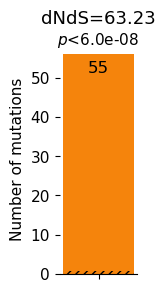

In [20]:
# for sampleee in repeated_samples:
for sampleee in ['all_samples']:
    sample_name_ = sampleee
    mut_filee    = f"{deepcsa_run_dir}/clean_somatic/{sample_name_}.somatic.mutations.tsv"
    omega_filee  = f"{deepcsa_run_dir}/omegagloballoc/output_mle.{sample_name_}.global_loc.tsv"
    print(sampleee)
    
    generate_all_side_figures(sample_name_,
                              mut_filee,
                              omega_filee,
                              ["TERTpromoter"],
                              plotts= plots_dir
                             )
